In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Necessary Libraries

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Importing Dataset

In [3]:
df.shape

(614, 13)

There are 614 rows and 13 columns in this dataset

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see that there are some null values available in the dataset

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Total 6 ccolumns have null values

In [6]:
#fill NaN's 
median = df['LoanAmount'].median()
df['LoanAmount'].fillna(median,inplace = True)

median1 = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(median1,inplace = True)

mode = df['Gender'].mode()[0]
df['Gender'].fillna(mode,inplace = True)

mode1 = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode1,inplace = True)

mode2 = df['Married'].mode()[0]
df['Married'].fillna(mode2,inplace = True)

mode3 = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode3,inplace = True)

mode4 = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode4,inplace = True)


Filled the Nan's

In [7]:
df['Loan_ID'] = df['Loan_ID'].apply(lambda x: x[4:])

The column Loan_Id have object data type and have ID's in different form so from this code only last 4 digits of the ID visible to us

In [8]:
df['Loan_ID'] = df['Loan_ID'].astype(int)

Changed the datatype Object to int

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see there is no null value present in the dataset


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1999.785016,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,567.097644,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,1002.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1532.750000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,1993.500000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,2476.750000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,2990.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [14]:
df.dtypes

Loan_ID                int32
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

As we can see there are diff data types for all the columns and our target variable have object datatype and in this we have classes so this is a classification problem 

Y    422
N    192
Name: Loan_Status, dtype: int64

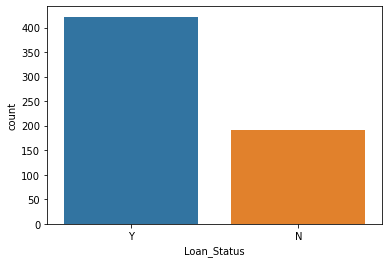

In [15]:
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

As we can see there are class imbalance problem in the dataset

Male      502
Female    112
Name: Gender, dtype: int64

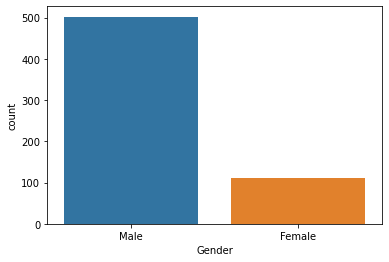

In [16]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

There are more Male's in the Dataset

Yes    401
No     213
Name: Married, dtype: int64

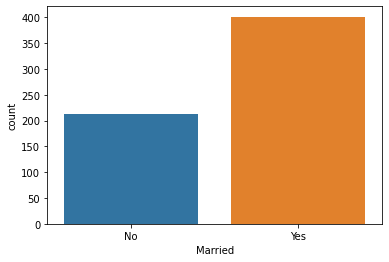

In [17]:
sns.countplot(df['Married'])
df['Married'].value_counts()

There are most of the people are married

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

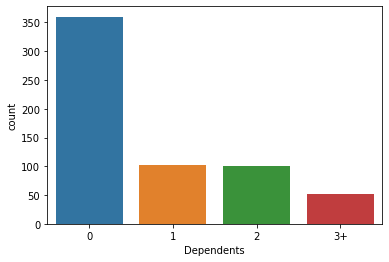

In [18]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

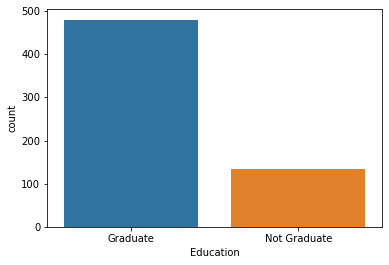

In [19]:
sns.countplot(df['Education'])
df['Education'].value_counts()

Most of the people are Graduated

No     532
Yes     82
Name: Self_Employed, dtype: int64

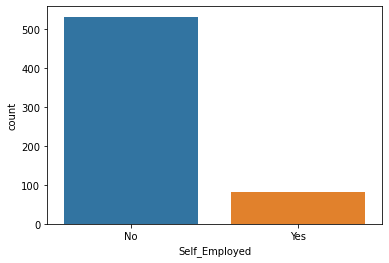

In [20]:
sns.countplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

Less people are self employed 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

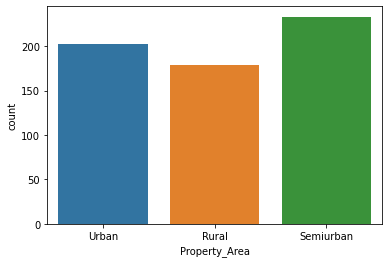

In [21]:
sns.countplot(df['Property_Area'])
df['Property_Area'].value_counts()

There are no major difference between property area

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

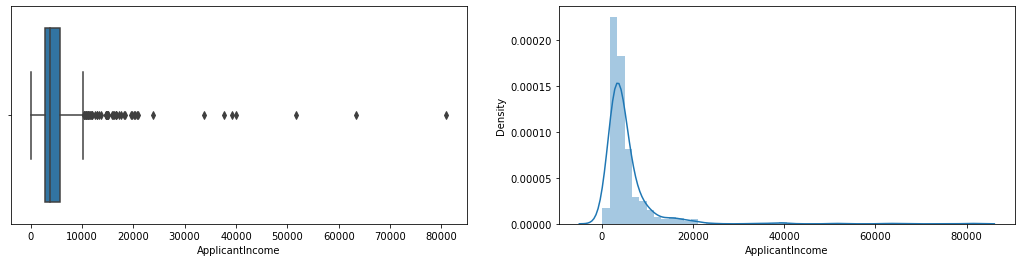

In [23]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.distplot(df['ApplicantIncome'])

As we can see there are outliers present in the dataset and data also positively skewed

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

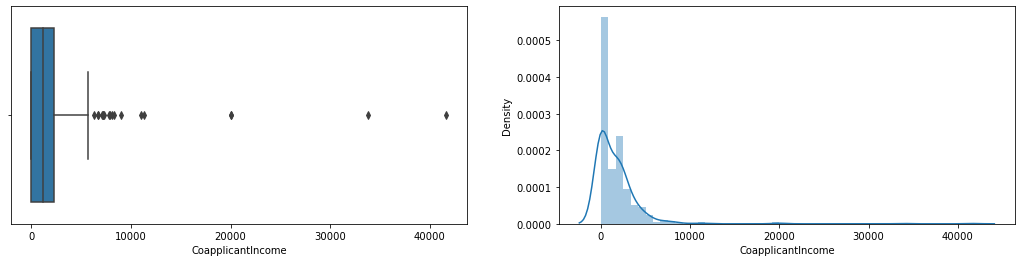

In [24]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['CoapplicantIncome'])
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'])

As we can see there are outliers present in the dataset and data also positively skewed

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

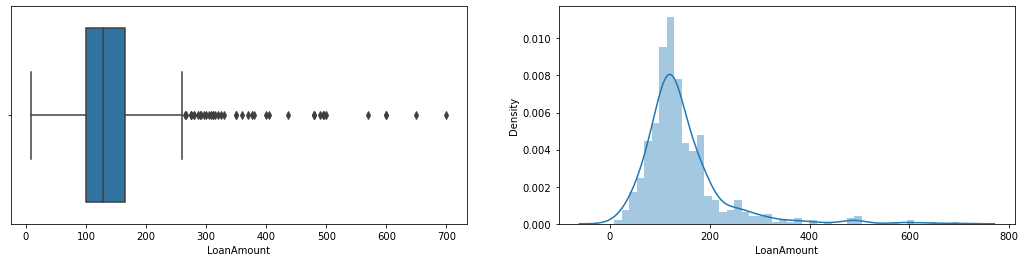

In [25]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.boxplot(df['LoanAmount'])
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'])

As we can see there are outliers present in the dataset and data also positively skewed

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

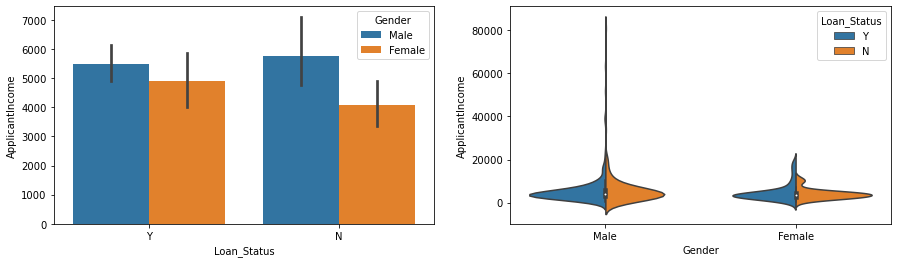

In [26]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Loan_Status',y = 'ApplicantIncome',hue = 'Gender')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Gender',y ='ApplicantIncome',hue= 'Loan_Status',split =True)

There are no major corelation between both of the columns

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

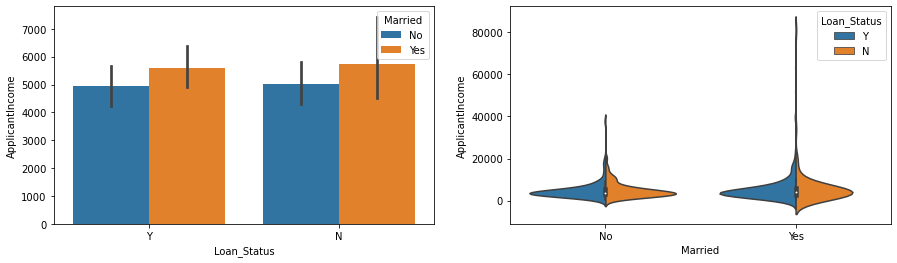

In [27]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Loan_Status',y = 'ApplicantIncome',hue = 'Married')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Married',y ='ApplicantIncome',hue= 'Loan_Status',split =True)

There are no major corelation between both of the columns towards the target variable

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

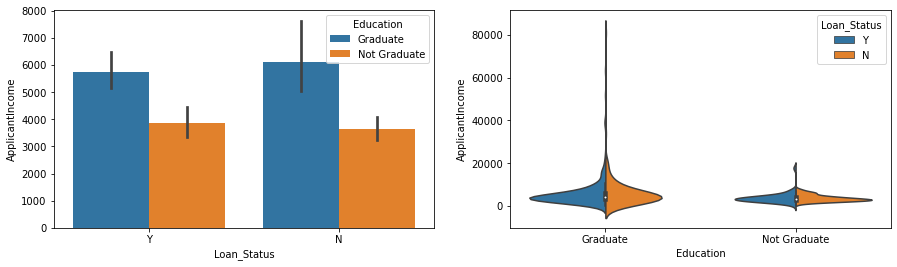

In [28]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Loan_Status',y = 'ApplicantIncome',hue = 'Education')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Education',y ='ApplicantIncome',hue= 'Loan_Status',split =True)

For Graduated and Non Graduated Loan status are same

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

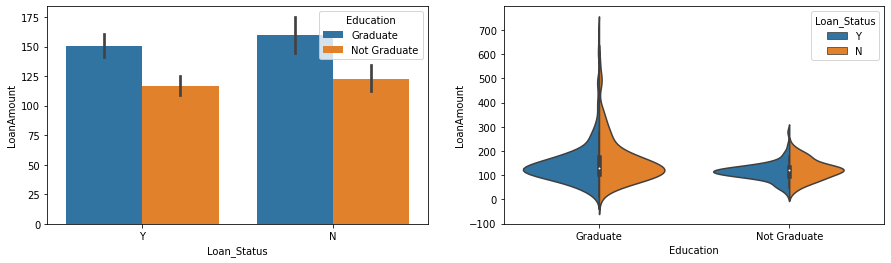

In [29]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Loan_Status',y = 'LoanAmount',hue = 'Education')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Education',y ='LoanAmount',hue= 'Loan_Status',split =True)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

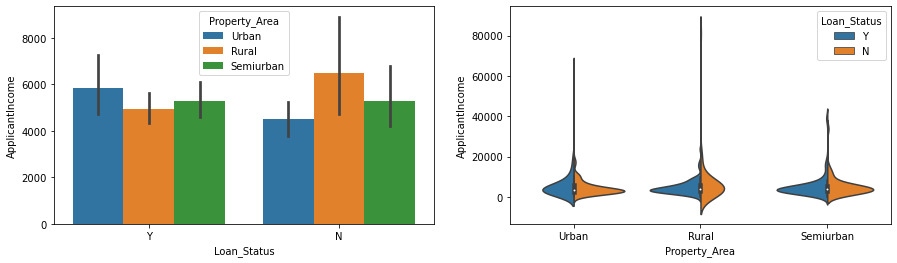

In [30]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'Loan_Status',y = 'ApplicantIncome',hue = 'Property_Area')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='Property_Area',y ='ApplicantIncome',hue= 'Loan_Status',split =True)

Loan status No is more for Rural area people 

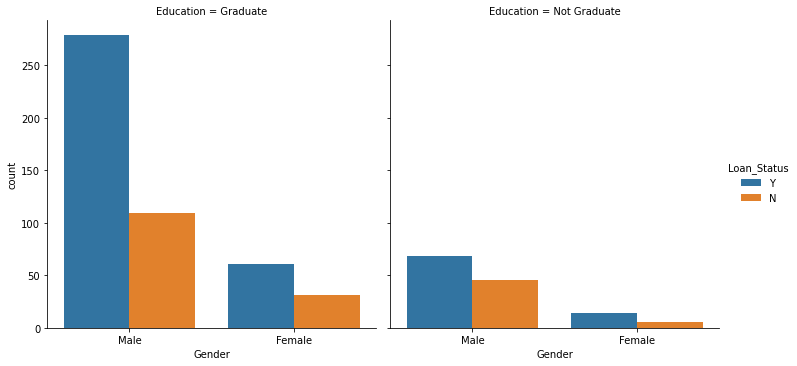

In [31]:
sns.catplot(data =df, x= 'Gender',hue ='Loan_Status',
           kind = 'count',col = 'Education')

Graduate people more chances to get loan

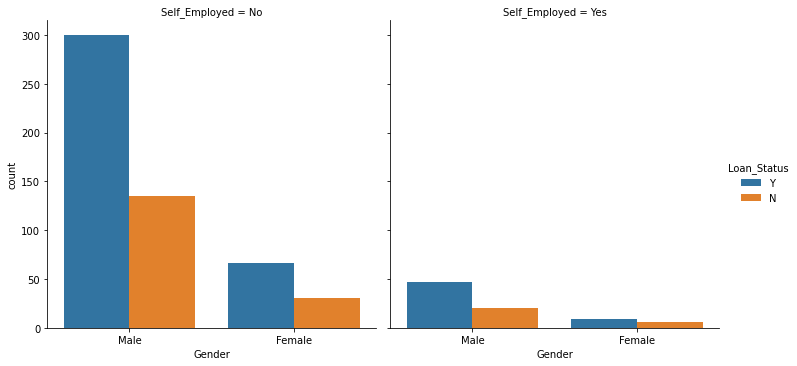

In [32]:
sns.catplot(data =df, x= 'Gender',hue ='Loan_Status',
           kind = 'count',col = 'Self_Employed')

Self employed peeople have less chances to get loan

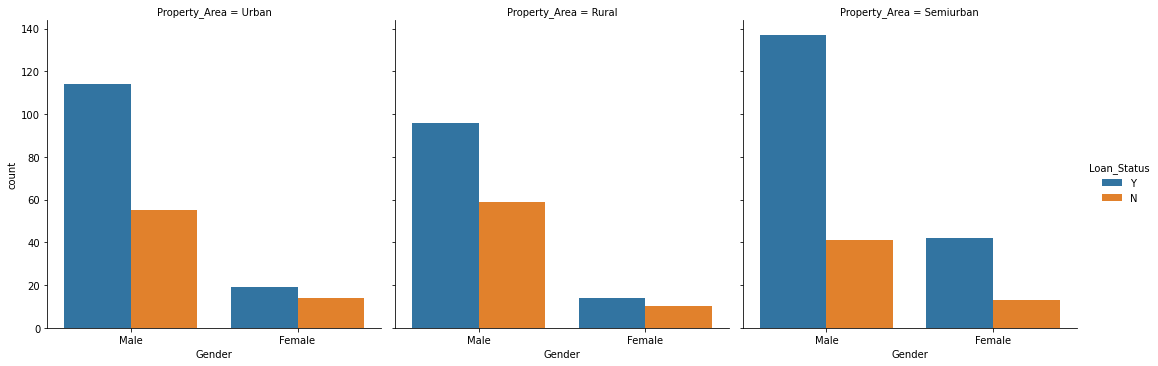

In [33]:
sns.catplot(data =df, x= 'Gender',hue ='Loan_Status',
           kind = 'count',col = 'Property_Area')

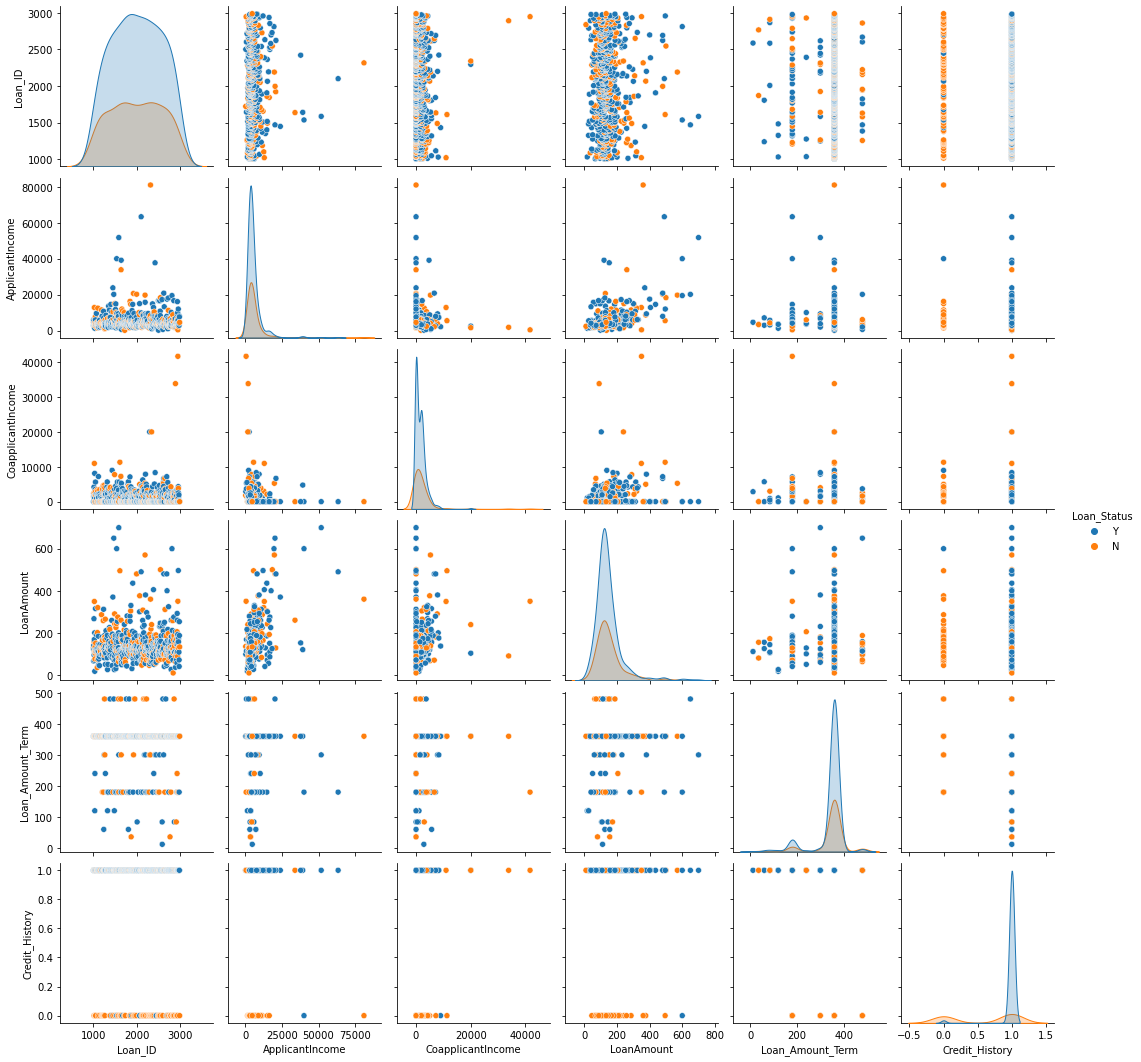

In [34]:
sns.pairplot(df,hue = 'Loan_Status')

In [35]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

Categorical columns

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing the libraries

In [37]:
#encoding the categorical data
encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in encode:
    df[i] = le.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,2979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,2983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,2984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [38]:
df_corr = df.corr().abs()
df_corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.027152,0.015693,0.051828,0.037547,0.034032,0.019331,0.039516,0.038845,0.034219,0.029891,0.158826,0.011958
Gender,0.027152,1.000000,0.364569,0.172914,0.045364,0.000525,0.058809,0.082912,0.106904,0.074030,0.009170,0.025752,0.017987
Married,0.015693,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,0.100912,0.010938,0.004257,0.091478
Dependents,0.051828,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,0.103864,0.040160,0.000244,0.010118
Education,0.037547,0.045364,0.012304,0.055752,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.065243,0.085884
Self_Employed,0.034032,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,0.016100,0.115100,0.033739,0.001550,0.030860,0.003700
ApplicantIncome,0.019331,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,0.116605,0.565181,0.046531,0.018615,0.009500,0.004710
CoapplicantIncome,0.039516,0.082912,0.075948,0.030430,0.062290,0.016100,0.116605,1.000000,0.189218,0.059383,0.011134,0.010522,0.059187
LoanAmount,0.038845,0.106904,0.146546,0.163103,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,0.000607,0.046632,0.033214
Loan_Amount_Term,0.034219,0.074030,0.100912,0.103864,0.073928,0.033739,0.046531,0.059383,0.036960,1.000000,0.004705,0.076120,0.022549


<AxesSubplot:>

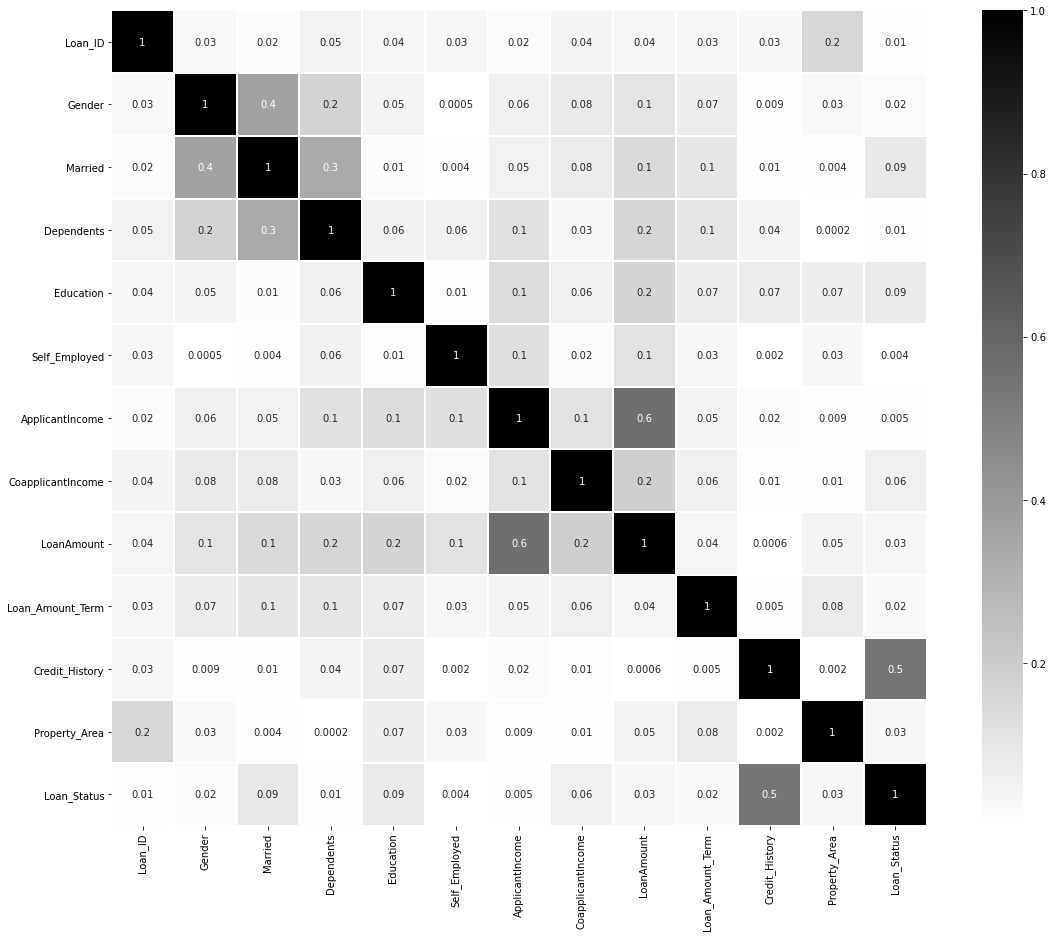

In [39]:
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,annot = True,square = True,
           fmt='.1g', linewidth = 1,cmap = 'binary')

From the above observation we can say that there are no major corelation between the features and target variable

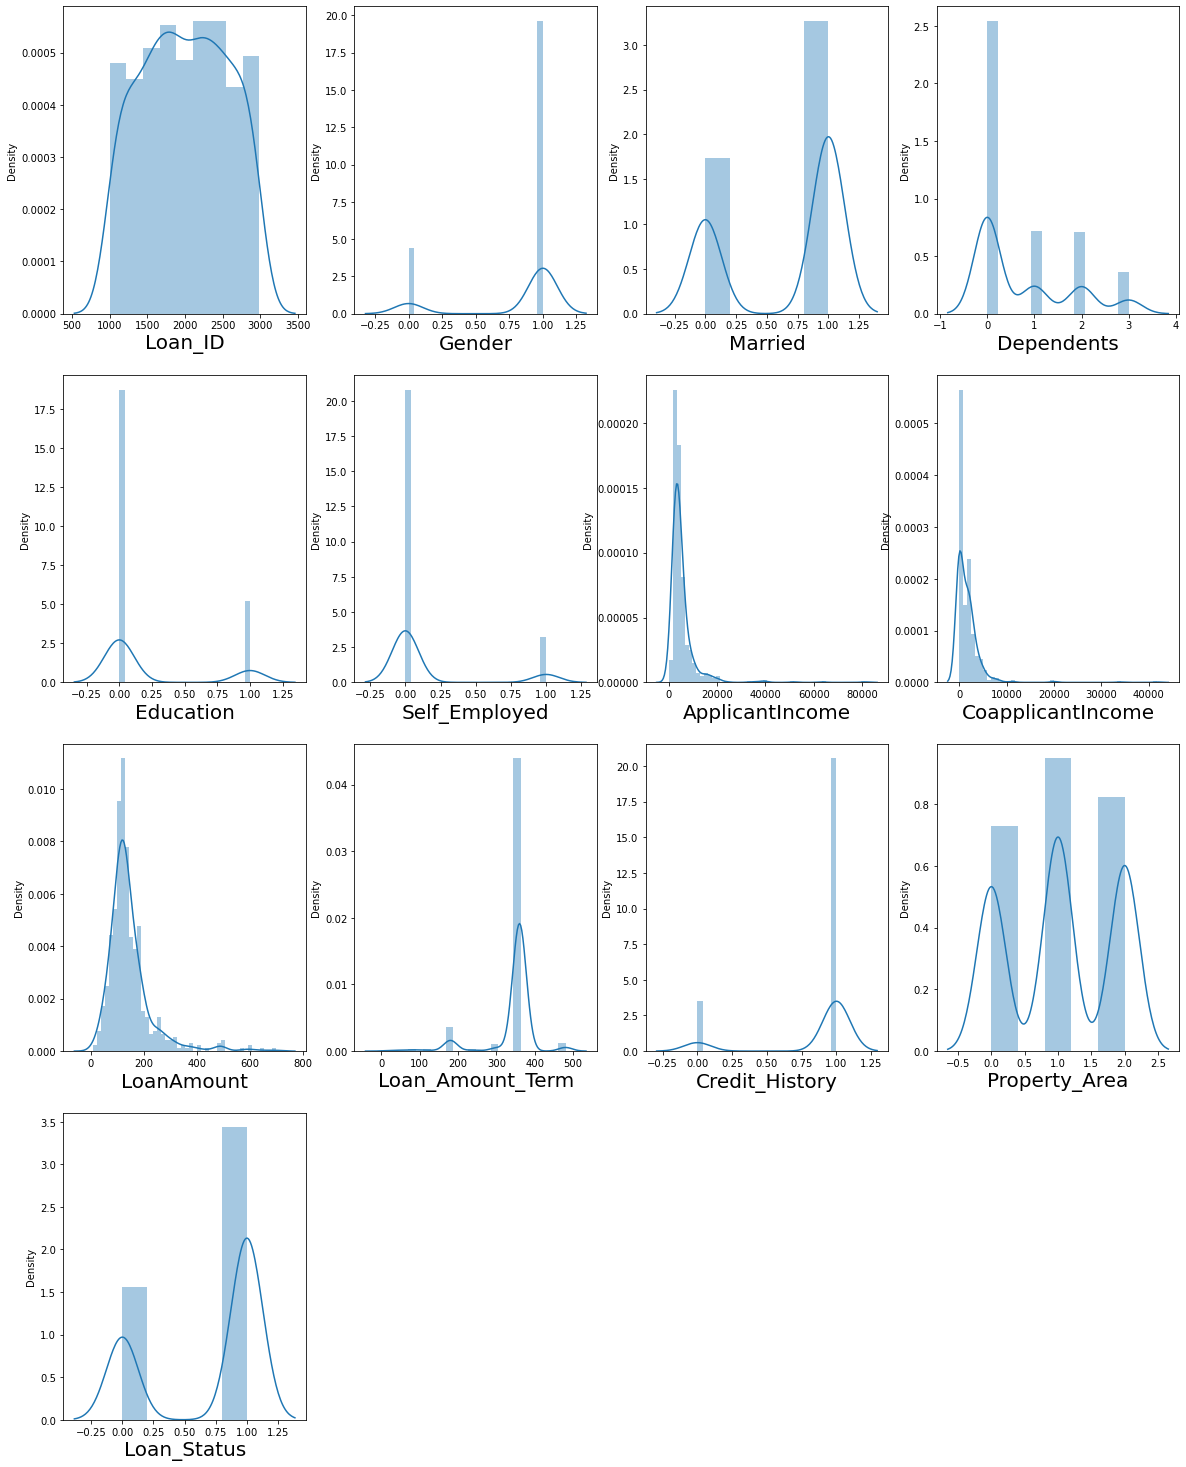

In [40]:
plt.figure(figsize = (20,26))
plotnumber = 1

for column in  df:
    if plotnumber <=15 :
        ax =plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [41]:
df.skew()

Loan_ID             -0.019809
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness before reemoving outliers

In [42]:
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis = 1)]

Removing outliers by using zscore method

In [43]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (614, 13)
Shape After: (577, 13)
Percentage Loss: 6.026058631921824


After removing outlier we get 6.02 % data loss

In [44]:
new_df.skew()

Loan_ID             -0.009884
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Skewness also reduced after removing outlier

In [45]:
new_df['ApplicantIncome'] = np.log(new_df['ApplicantIncome'])
new_df['CoapplicantIncome'] = np.sqrt(new_df['CoapplicantIncome'])
new_df['LoanAmount'] = np.sqrt(new_df['LoanAmount'])

Removing skewness of the numerical data

In [46]:
new_df.skew()

Loan_ID             -0.009884
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [47]:
#Seprating the target variable
x = new_df.drop('Loan_Status',axis = 1)
y = new_df['Loan_Status']

In [48]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

As we see above there are class imbalance problem in the dataset

In [49]:
new_df.skew()

Loan_ID             -0.009884
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [ ]:
#Resampling the data by using SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

Class imbalnce problem fixed

In [51]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [52]:
#Scaling the data using standard scaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [53]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    pred = log_reg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is',maxAccu, 'on Random State',maxRS)

Best Accuracy is 0.8492462311557789 on Random State 86


We get 86 as best Rando State

In [54]:
x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

Accuracy_Score : 0.8492462311557789
Confusion_Matrix:
 [[ 63  21]
 [  9 106]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        84
           1       0.83      0.92      0.88       115

    accuracy                           0.85       199
   macro avg       0.85      0.84      0.84       199
weighted avg       0.85      0.85      0.85       199

Roc_Auc Score: 0.8358695652173913


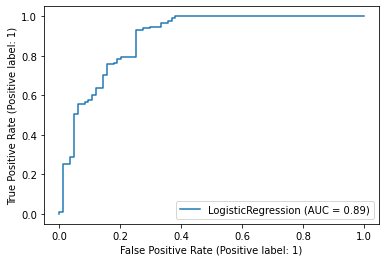

In [55]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predlr = log_reg.predict(x_test)
LRC = accuracy_score(y_test,predlr)
print('Accuracy_Score :',LRC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predlr))
print('Classification_Report:\n',classification_report(y_test,predlr))
print('Roc_Auc Score:',roc_auc_score(y_test,predlr))

metrics.plot_roc_curve(log_reg, x_test, y_test)  
plt.show()  

By applying LogisticRegression we get 84.92 accuracy score

Accuracy_Score : 0.7939698492462312
Confusion_Matrix:
 [[72 12]
 [29 86]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        84
           1       0.88      0.75      0.81       115

    accuracy                           0.79       199
   macro avg       0.80      0.80      0.79       199
weighted avg       0.81      0.79      0.80       199

Roc_Auc Score: 0.8024844720496895


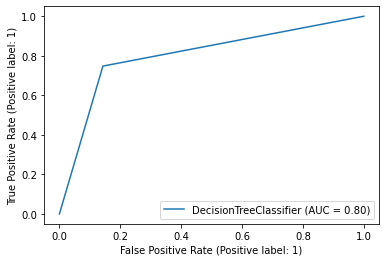

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
DTC = accuracy_score(y_test,preddt)
print('Accuracy_Score :',DTC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification_Report:\n',classification_report(y_test,preddt))
print('Roc_Auc Score:',roc_auc_score(y_test,preddt))

metrics.plot_roc_curve(dt, x_test, y_test)  
plt.show()  

By applying DecisionTreeClassifier we get 79.39 accuracy score

Accuracy_Score : 0.8894472361809045
Confusion_Matrix:
 [[ 68  16]
 [  6 109]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        84
           1       0.87      0.95      0.91       115

    accuracy                           0.89       199
   macro avg       0.90      0.88      0.88       199
weighted avg       0.89      0.89      0.89       199

Roc_Auc Score: 0.8786749482401656


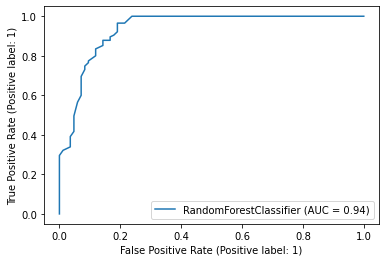

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
RFC = accuracy_score(y_test,predrf)
print('Accuracy_Score :',RFC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification_Report:\n',classification_report(y_test,predrf))
print('Roc_Auc Score:',roc_auc_score(y_test,predrf))

metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()  

By applying RandomForestClassifier we get 88.94 accuracy score

Accuracy_Score : 0.8542713567839196
Confusion_Matrix:
 [[ 62  22]
 [  7 108]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81        84
           1       0.83      0.94      0.88       115

    accuracy                           0.85       199
   macro avg       0.86      0.84      0.85       199
weighted avg       0.86      0.85      0.85       199

Roc_Auc Score: 0.8386128364389234


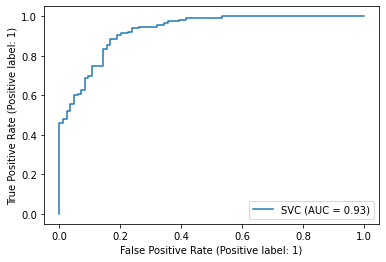

In [58]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
SVC = accuracy_score(y_test,predsvc)
print('Accuracy_Score :',SVC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predsvc))
print('Classification_Report:\n',classification_report(y_test,predsvc))
print('Roc_Auc Score:',roc_auc_score(y_test,predsvc))

metrics.plot_roc_curve(svc, x_test, y_test)  
plt.show()  

By applying SVC we get 85.42 accuracy score

In [59]:
#Calculating Cross_Val_score
LRCV = cross_val_score(log_reg, x, y, cv = 5)
print('Cross Validation score of LogisticRegression model:',LRCV.mean())

Cross Validation score of LogisticRegression model: 0.7337342767295598


In [60]:
DTCV = cross_val_score(dt, x, y, cv = 5)
print('Cross Validation score of DecisionTree model:',DTCV.mean())

Cross Validation score of DecisionTree model: 0.4674449685534591


In [61]:
RFCV = cross_val_score(rf,x,y,cv = 5)
print('Cross Validation score of RandomForest model:',RFCV.mean())

Cross Validation score of RandomForest model: 0.5391352201257862


In [62]:
SVCV = cross_val_score(svc,x,y,cv = 5)
print('Cross Validation score of SVC model:',SVCV.mean())

Cross Validation score of SVC model: 0.19213050314465407


In [63]:
#Creating DataFrame of Difference between acc_Score and CV score
pd.DataFrame({'Model':['Logistic Regression','RandomForestClassifier','DecisionTreeClassifier','SVC'],
             'acc_score':[LRC,RFC,DTC,SVC],
             'cross_val_score':[LRCV.mean(),RFCV.mean(),DTCV.mean(),SVCV.mean()],
             'Difference':[(LRC-LRCV.mean()),(RFC-RFCV.mean()),(DTC-DTCV.mean()),(SVC-SVCV.mean())]})

,Model,acc_score,cross_val_score,Difference
0,Logistic Regression,0.849246,0.733734,0.115512
1,RandomForestClassifier,0.889447,0.539135,0.350312
2,DecisionTreeClassifier,0.793970,0.467445,0.326525
3,SVC,0.854271,0.192131,0.662141


From the above observation we can say that logisttic regression have less difference so we use top 3 algo for the GridSearchCV i.e Logistic regression , RandomForestClassifier and DecisionTreeClassifier

In [64]:
#GridSearchCV Parameteers for RandomForestClassifier
#Adding parameters 
parameters = {'n_estimators':[20,30,40,50,60],
              'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,6,7],
              'max_features':['auto','sqrt','log2'],
              'min_samples_leaf':[1,2,3,4,5]}

In [65]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 30, 40, 50, 60]})

In [66]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'n_estimators': 20}

Get Best Parameters for Logistic regression

Accuracy Score of the RF Model: 88.94472361809045
Cross Validation Score of RF Model is 56.05503144654088
Confusion Matrix:
 [[ 66  18]
 [  4 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        84
           1       0.86      0.97      0.91       115

    accuracy                           0.89       199
   macro avg       0.90      0.88      0.88       199
weighted avg       0.90      0.89      0.89       199

roc_auc_score: 87.54658385093167


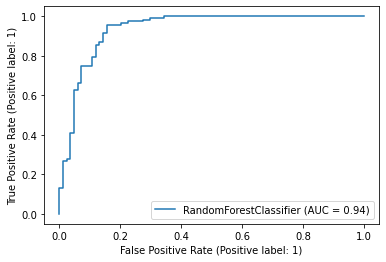

In [67]:
rfmod = RandomForestClassifier(criterion = 'entropy',max_depth =7, max_features = 'log2',n_estimators = 20, min_samples_leaf = 3,)

rfmod.fit(x_train,y_train)
pred = rfmod.predict(x_test)
print('Accuracy Score of the RF Model:',accuracy_score(y_test,pred)*100)
rfmodCV = cross_val_score(rfmod,x,y,cv = 5)
print('Cross Validation Score of RF Model is',rfmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(rfmod,x_test,y_test)
plt.show()


By applying Best Params to the RandomForestClassifier we get 88.94 Accuracy Score

In [68]:
#GridSearchCV Parameteers for LogisticRegression
#Adding parameters 
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[1.0,1.3,1.6,1.8,],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'intercept_scaling':[1,2,3,4,5]}

In [69]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(log_reg,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 1.0, 'intercept_scaling': 1, 'penalty': 'l1', 'solver': 'saga'}

Accuracy Score of the logistic regression Model: 84.92462311557789
Cross Validation Score of logistic regression Model is 46.734276729559745
Confusion Matrix:
 [[ 63  21]
 [  9 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        84
           1       0.83      0.92      0.88       115

    accuracy                           0.85       199
   macro avg       0.85      0.84      0.84       199
weighted avg       0.85      0.85      0.85       199

roc_auc_score: 83.58695652173913


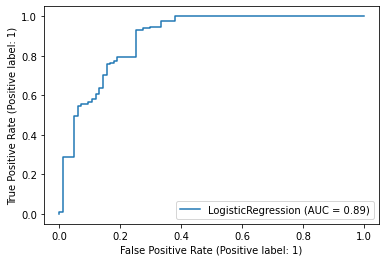

In [73]:
lrmod = LogisticRegression(penalty = 'l1',C =1.0, solver = 'saga', intercept_scaling = 1,)

lrmod.fit(x_train,y_train)
pred = lrmod.predict(x_test)
print('Accuracy Score of the logistic regression Model:',accuracy_score(y_test,pred)*100)
lrmodCV = cross_val_score(lrmod,x,y,cv = 5)
print('Cross Validation Score of logistic regression Model is',lrmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(lrmod,x_test,y_test)
plt.show()


By applying Best Params to the LogisticRegression we get 84.92 Accuracy Score

In [74]:
parameters = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'splitter' :['best', 'random']}

In [75]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(dt,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

Accuracy Score of the DT Model: 83.91959798994975
Cross Validation Score of DT is 61.21147798742139
Confusion Matrix:
 [[ 55  29]
 [  3 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77        84
           1       0.79      0.97      0.88       115

    accuracy                           0.84       199
   macro avg       0.87      0.81      0.82       199
weighted avg       0.86      0.84      0.83       199

roc_auc_score: 81.43374741200829


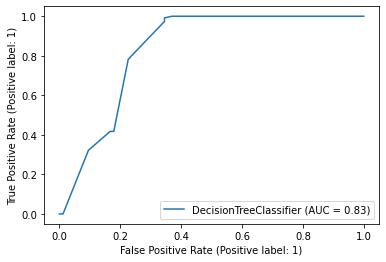

In [76]:
mod = DecisionTreeClassifier(criterion = 'entropy',max_features = 'log2',max_depth = 4,splitter = 'best')

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print('Accuracy Score of the DT Model:',accuracy_score(y_test,pred)*100)
modCV = cross_val_score(mod,x,y,cv = 5)
print('Cross Validation Score of DT is',modCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(mod,x_test,y_test)
plt.show()

By applying Best Params to the DecisionTreeClassifier we get 83.91 Accuracy Score

In [78]:
#Saving Final Model
import joblib
joblib.dump(rfmod,'Loan Application Status Prediction.pkl')

['Loan Application Status Prediction.pkl']

Saving the RandomForest Model because it have more accuracy than th eothers